## 9. Stable Diffusion with Guidance
Reproduce figure 9.41

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from diffusers import DDPMScheduler, DDIMScheduler
from diffusers.utils.torch_utils import randn_tensor

In [2]:
model_id = "sd2-community/stable-diffusion-2-1"
# model_id = "runwayml/stable-diffusion-v1-5"

# scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")
scheduler = DDIMScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, scheduler=scheduler, torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [3]:
# prompt = "a photo of an astronaut riding a horse on mars"
prompt = "A lone tree standing in the middle of a desert, under the harsh light of midday, casting a long shadow on the sand."
# prompt="The image depicts a humorous and surreal scene on a highway. An elderlywoman is riding a classic bicycle, speeding down the road at an astonishing pace. Her expression is one of determination, mixed with a hint of joy, while her scarf flutters wildly in the wind, emphasizing her incredible speed. Next to her, a sleek, modern sports car is visibly being overtaken. The driver, wide-eyed and astonished, glances at the speeding grandmother in disbelief. The highway scenery is blurred with motion streaks and light trails, enhancing the sense of extreme velocity. Dust and wind effects swirl around the bicycle wheels, creating an impression of a high-speed race. The sky above is bright blue with a few clouds, and modern road signs add to the dynamic urban setting.extrem funny"
# prompt="black and white photography, fashion editorial, a silhouette of woman with abstract hair in black and white, art concept, highres, realistic photo, professional photography, cinematic angle, dynamic light back shining,"
# prompt="fashion editorial, highly detailed photo, fashion photography, old paper close-up black haired girl with closed eyes in depression and anxiety, portrait, beauty, minimalist, decorative full flowing intricate fine detail, highres, realistic photo, professional photography, cinematic angle, dynamic light back shining,"

In [4]:
generator = torch.Generator(device="cuda").manual_seed(8)  # For reproducability
# generator = torch.Generator(device="cuda").manual_seed(42)

In [5]:
guidance_scale = 5.0  # This is "alpha" in the text
image = pipe(prompt, guidance_scale=guidance_scale, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

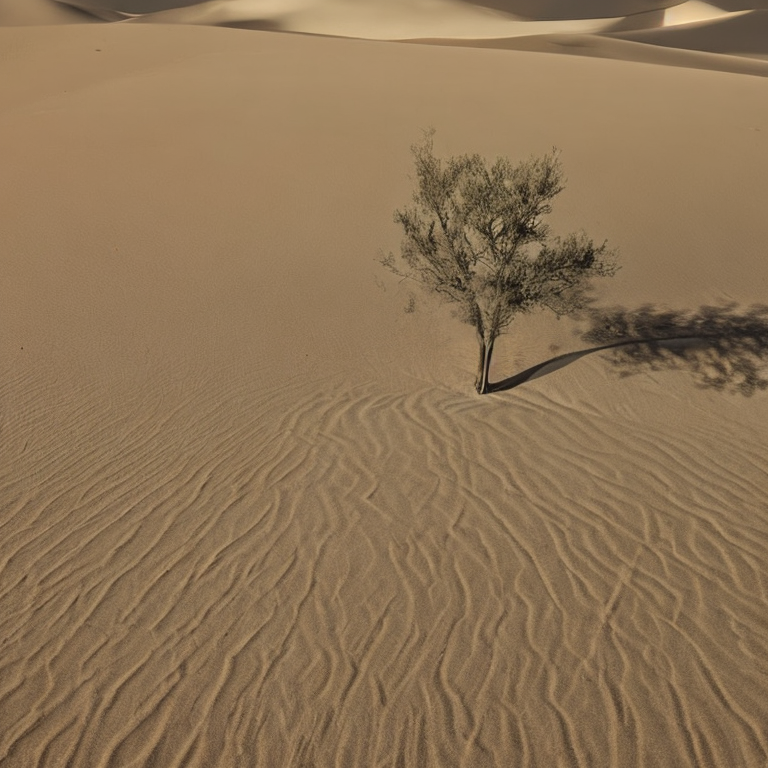

In [6]:
image